<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 1. 1. ***Analisis exploratorio*** y descriptivo de la base de datos 

En este a partado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [31]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Importanto bibliotecas
import pandas as pd
import re 
from wordcloud import WordCloud, ImageColorGenerator
import spacy 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np 

# Importando el CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import nltk 
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt') # necesario para descargar el tokenizador
nltk.download('stopwords')

import pyLDAvis.sklearn


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Importacion de spacy 
import spacy.cli
spacy.cli.download("es_core_news_sm") 

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [34]:
import es_core_news_sm
spc_es = es_core_news_sm.load()

In [35]:
# Extracción de Stopwords en español
stopwords_es = stopwords.words("spanish")

In [36]:
#Dataset
df = pd.read_csv('https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv')
df.head()

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@ALangebaek\n·\n1 dic.,La confianza se afectó. El indicador de confia...,NaN,1.0,7,19,['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...,https://twitter.com/ALangebaek/status/14661458...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_futura\n·\n1 dic.,Buscamos la accesibilidad y mejor atención en ...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.com/ext_tw_video_thumb/146...,https://twitter.com/plaza_futura/status/146615...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@JulianM998\n·\n1 dic.,Señores \n@Davivienda\n no he podido ingresar ...,NaN,1.0,NaN,1,[],https://twitter.com/JulianM998/status/14661775...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr28\n·\n1 dic.,Llevo toda una semana sufriendo intento de hur...,NaN,2.0,1,2,[],https://twitter.com/fergomezr28/status/1466021...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSuspLo\n·\n1 dic.,Hemos retrocedido tanto en este país con este ...,NaN,3.0,NaN,8,[],https://twitter.com/MirandaSuspLo/status/14661...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1811 entries, 0 to 1810
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1811 non-null   int64  
 1   UserScreenName  1807 non-null   object 
 2   UserName        1811 non-null   object 
 3   Timestamp       1811 non-null   object 
 4   Text            1811 non-null   object 
 5   Embedded_text   1811 non-null   object 
 6   Emojis          295 non-null    object 
 7   Comments        838 non-null    float64
 8   Likes           247 non-null    object 
 9   Retweets        643 non-null    object 
 10  Image link      1811 non-null   object 
 11  Tweet URL       1811 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 169.9+ KB


In [38]:
df['Likes'].value_counts()

1          143
2           58
3           12
4            6
6            5
7            4
5            4
10           2
19           1
29           1
11           1
16           1
14           1
838          1
15           1
1,5 mil      1
115          1
9            1
8            1
326          1
13           1
Name: Likes, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


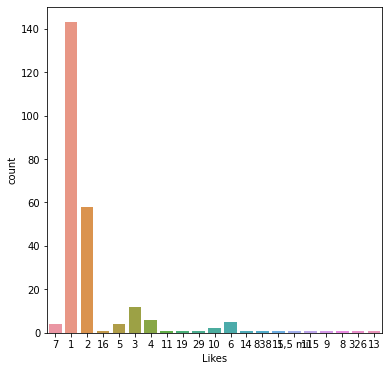

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(df['Likes'])
plt.show()

In [39]:
df['Retweets'].value_counts()

1          343
2          126
3           48
4           36
5           16
6           10
7            9
11           7
14           6
9            6
8            5
10           3
13           3
19           3
23           2
25           2
20           1
1 mil        1
855          1
12           1
252          1
2,5 mil      1
17           1
15           1
48           1
123          1
60           1
16           1
18           1
43           1
38           1
89           1
171          1
24           1
Name: Retweets, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


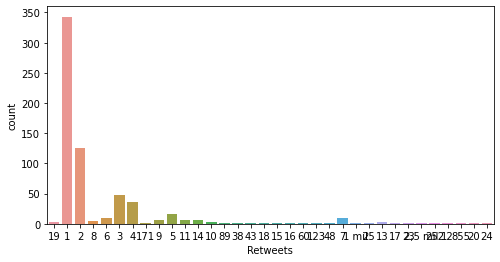

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(df['Retweets'])
plt.show()

In [40]:
df['Emojis'].value_counts()

😡                9
💚                8
👋                6
🥃                6
👇                5
                ..
❤ ❤              1
🙈 🙈 🙈            1
😅 😅 😅 🤭 🤭        1
🎄 🌈 ⛄ 🎄 🎅 🦌 🎁    1
🍓                1
Name: Emojis, Length: 212, dtype: int64

Detecto usarios que más interactuan

In [41]:
usuarios_frecuentes = round(sum(df.duplicated("UserName"))/len(df)*100, 2)
print(f"Porcentaje de @UserNames que más interactuan : {usuarios_frecuentes }%.")

Porcentaje de @UserNames que más interactuan : 35.51%.


In [42]:
df[df.duplicated("UserName", keep =  False)].sort_values(by = "UserName")

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
1570,1570,elisa,@04Elisabeth,2021-12-21T04:50:44.000Z,elisa\n@04Elisabeth\n·\n20 dic.,Señores \n@SFCsupervisor\n ya pongan en cintur...,💚,NaN,NaN,NaN,['https://pbs.twimg.com/profile_images/1377615...,https://twitter.com/04Elisabeth/status/1473153...
1355,1355,elisa,@04Elisabeth,2021-12-18T08:40:17.000Z,elisa\n@04Elisabeth\n·\n18 dic.,"@Davivienda\n ustedes tienen muchas denuncias,...",NaN,1.0,NaN,NaN,['https://pbs.twimg.com/profile_images/1311704...,https://twitter.com/04Elisabeth/status/1472124...
619,619,Alfred Maggiore,@AlfredMaggiore,2021-12-12T20:47:34.000Z,Alfred Maggiore\n@AlfredMaggiore\n·\n12 dic.,"En respuesta a \n@Davivienda\nJa, perdí media ...",NaN,NaN,NaN,NaN,[],https://twitter.com/AlfredMaggiore/status/1470...
621,621,Alfred Maggiore,@AlfredMaggiore,2021-12-12T20:09:25.000Z,Alfred Maggiore\n@AlfredMaggiore\n·\n12 dic.,En respuesta a \n@AlfredMaggiore\n y \n@Davivi...,NaN,NaN,NaN,NaN,[],https://twitter.com/AlfredMaggiore/status/1470...
631,631,Alfred Maggiore,@AlfredMaggiore,2021-12-12T20:11:21.000Z,Alfred Maggiore\n@AlfredMaggiore\n·\n12 dic.,En respuesta a \n@Davivienda\nDetesto la termi...,NaN,1.0,NaN,NaN,[],https://twitter.com/AlfredMaggiore/status/1470...
...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,Albeibi,@undercity90,2021-12-10T01:03:56.000Z,Albeibi\n@undercity90\n·\n9 dic.,Davivienda es pa' las perras.\n1\n1,NaN,1.0,NaN,1,[],https://twitter.com/undercity90/status/1469110...
722,722,Albeibi,@undercity90,2021-12-14T19:55:26.000Z,Albeibi\n@undercity90\n·\n14 dic.,Otro número en donde se hacen pasar por \n@Dav...,NaN,1.0,4,4,[],https://twitter.com/undercity90/status/1470844...
376,376,Albeibi,@undercity90,2021-12-08T22:16:16.000Z,Albeibi\n@undercity90\n·\n8 dic.,Hasta Davivienda se volvió horrible.\n1,NaN,1.0,NaN,NaN,[],https://twitter.com/undercity90/status/1468706...
456,456,videorgánica,@videorganica1,2021-12-09T13:45:46.000Z,videorgánica\n@videorganica1\n·\n9 dic.,@Davivienda\n y sus portarles que no sirven !!...,NaN,1.0,NaN,NaN,[],https://twitter.com/videorganica1/status/14689...


In [75]:
df['Image link']

0       ['https://pbs.twimg.com/media/FFjL57eXMAISBnk?...
1       ['https://pbs.twimg.com/ext_tw_video_thumb/146...
2                                                      []
3                                                      []
4                                                      []
                              ...                        
1806                                                   []
1807                                                   []
1808                                                   []
1809                                                   []
1810                                                   []
Name: Image link, Length: 1811, dtype: object

## 2. Prepocesamiento de Texto Prepocesamiento del texto: Tokenizar, Limpieza, Stopwords,Lematizar 

In [43]:
# Eliminación de tweets vacios
df['Embedded_text'] = df['Embedded_text'].dropna()
df['Embedded_text']

0       La confianza se afectó. El indicador de confia...
1       Buscamos la accesibilidad y mejor atención en ...
2       Señores \n@Davivienda\n no he podido ingresar ...
3       Llevo toda una semana sufriendo intento de hur...
4       Hemos retrocedido tanto en este país con este ...
                              ...                        
1806    En respuesta a \n@JaimeMolina\nBuenas tardes. ...
1807    En respuesta a \n@josefe71\nHola Jose , gracia...
1808    En respuesta a \n@gleniiaaa\nHola! Bienvenida ...
1809    En respuesta a \n@diegoruix\nBuenos días, Sr. ...
1810    En respuesta a \n@diegoruix\nBuenas tardes, Sr...
Name: Embedded_text, Length: 1811, dtype: object

In [44]:
# Verificación de stostopwords en español
stopwords_es

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

### Esta función toma una cadena, reduce todo, filtra solo letras, elimina palabras vacías, lematiza y devuelve la cadena resultante.

In [45]:
def limpia_texto(texto):
  '''(str) -> str
  Esta función toma una cadena, reduce todo, filtra solo letras, elimina palabras vacías,
   lematiza y devuelve la cadena resultante.
  '''
  texto = texto.lower()

  texto = re.sub(r"[\W\d_]+", " ", texto)

  texto = [pal for pal in texto.split() if pal not in stopwords_es]

  spc_texto = spc_es(" ".join(texto))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]
  
  return " ".join(tokens)

In [46]:
df['Embedded_text'] = df['Embedded_text'].apply(limpia_texto)

In [47]:
# Texto con Tokenización, Limpieza, Stopwordsm y Lematización
df['Embedded_text']

0       confianza afectar indicador confianza davivien...
1       buscar accesibilidad mejor atención trámite ba...
2       señor daviviendir poder ingresar app daviviend...
3       llevar todo semana sufrir intento hurto medio ...
4       retrocedido país gobierno malparido cajero dav...
                              ...                        
1806    respuesta jaimemolín buena tarde sr jaimar mom...
1807    respuesta josefe hola jo él gracias escribirno...
1808    respuesta gleniiaaa holo bienvenida canal aten...
1809    respuesta diegoruix buen día sr diego evidence...
1810    respuesta diegoruix buena tarde sr diego antem...
Name: Embedded_text, Length: 1811, dtype: object

## 3. WordClouds o Nubes de Palabras

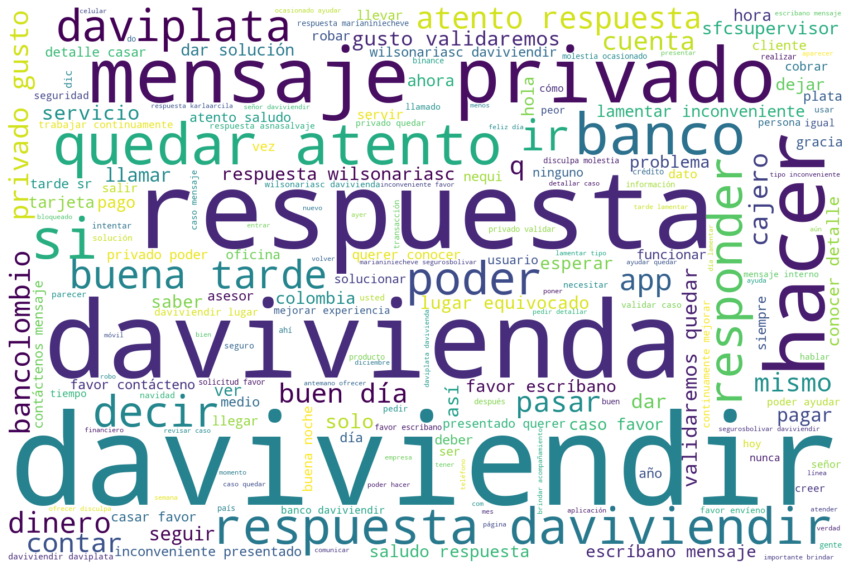

In [48]:
#Lista de Stopword:
stopwords = set(stopwords.words('spanish')) # stopwords de nltk en español
stopwords.update(["|", "-", "NaN"]) # adicionales que no están en stopwords

# Imagen de nube de palabras

text = ' '.join(df['Embedded_text'].astype('str')) 
wordcloud = WordCloud(width = 1500, height = 1000, stopwords=stopwords, max_font_size=300, max_words=200, background_color="white").generate(text)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 4. Matriz termino-documento - Document-Term Matrix

Notaremos como "Com" los comentarios por cada usuario

In [49]:
# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(df['Embedded_text'])
# Seleccione las primeras cinco filas del conjunto de datos
td = pd.DataFrame(vects.todense()).iloc[:5]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Com '+str(i) for i in range(1, 6)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 palabras
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Imprime las primeras 10 filas
print(term_document_matrix.drop(columns=['total_count']).head(10))

             Com 1  Com 2  Com 3  Com 4  Com 5
daviviendir      1      0      2      1      1
banco            0      4      0      0      0
poder            0      0      1      2      0
davivienda       0      1      0      1      0
confianza        2      0      0      0      0
semana           1      0      0      1      0
mes              2      0      0      0      0
mejor            1      1      0      0      0
indicador        2      0      0      0      0
llevar           0      0      1      1      0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Histograma de palabras

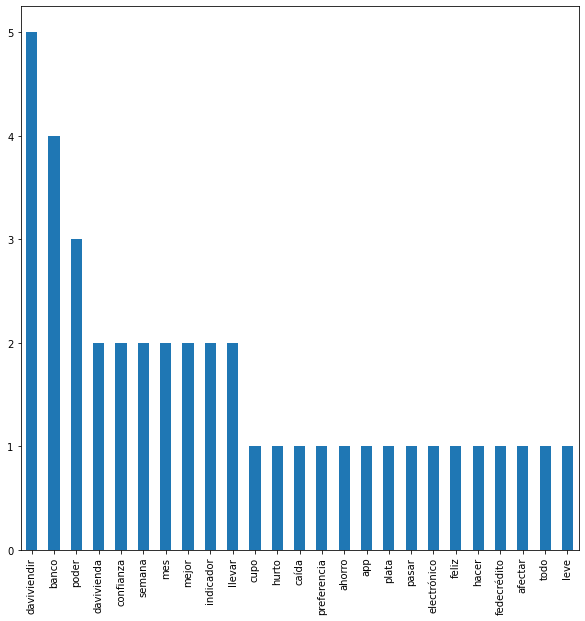

In [50]:
plt.figure(figsize=(10,10))
term_document_matrix['total_count'].plot.bar()
plt.show()

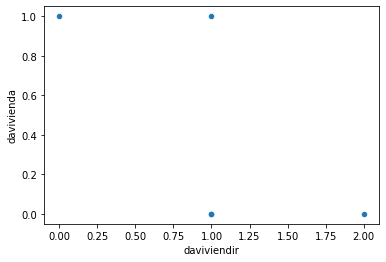

In [51]:
# Ubicando"daviviendir" y 'davivienda' para en los documentos
term_document_matrix.loc[['daviviendir', 'davivienda']].T

# # Creando un diagrama de dispersión de las frecuencias
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='daviviendir', y='davivienda')

### Semejanza de coseno
nos mide la similitud comentarios

In [52]:
# Define la función de similitud del coseno.
def cosine_similarity(a,b):
    "calcula la similitud del coseno de v1 a v2: (a punto b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]; y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [53]:
# Guardar el índice de similitud entre los comentarios
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]

dic={} 
for (a,b) in list(pair(['Com 1', 'Com 2', 'Com 3', 'Com 4', 'Com 5'])):
  dic[(a,b)] = cosine_similarity(term_document_matrix[a].tolist(), term_document_matrix[b].tolist())

# Print the cosine similarity index
print(dic)

{('Com 1', 'Com 2'): 0.05270462766947299, ('Com 1', 'Com 3'): 0.1781741612749496, ('Com 1', 'Com 4'): 0.1143323900950059, ('Com 1', 'Com 5'): 0.23570226039551587, ('Com 2', 'Com 3'): 0.0, ('Com 2', 'Com 4'): 0.05423261445466404, ('Com 2', 'Com 5'): 0.0, ('Com 3', 'Com 4'): 0.4583492485141057, ('Com 3', 'Com 5'): 0.7559289460184544, ('Com 4', 'Com 5'): 0.24253562503633297}


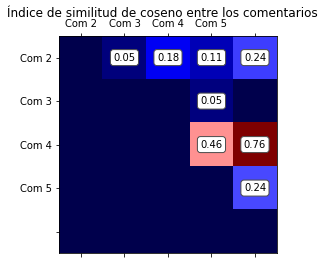

In [54]:
documents= ['Com 1', 'Com 2', 'Com 3', 'Com 4', 'Com 5']
final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents 


fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(documents)))
ax.set_yticks(np.arange(len(documents)))
ax.set_xticklabels(documents)
ax.set_yticklabels(documents)
ax.matshow(final_df, cmap='seismic')
for (i, j), z in np.ndenumerate(final_df):
  if z != 0 :
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
  else:
    None

fig.suptitle('Índice de similitud de coseno entre los comentarios')
plt.show()

## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [55]:
from sklearn.decomposition import LatentDirichletAllocation

In [56]:
vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words= stopwords_es, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
tweets_vectorized = vectorizer_.fit_transform(df['Embedded_text'])

<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-56-cd3e585a712e>:1: DeprecationWarning: invalid escape sequence \-
  vectorizer_ = CountVectorizer(min_df=5, max_df=0.9, stop_words= stopwords_es, lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ais', 'amos', 'bamos', 'est', 'estuvi', 'hab', 'habr', 'hubi', 'ramos', 'semos', 'ser', 'tambi', 'ten', 'tendr', 'teng', 'tuvi'] not in stop_words.
  % sorted(inconsistent)


In [57]:
lda_ = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online',verbose=True)
tweets_lda = lda_.fit_transform(tweets_vectorized)

iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


# keywords

In [58]:
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [59]:
print("Tweets Modelo LDA:")
selected_topics(lda_, vectorizer_)

Tweets Modelo LDA:
Topic 0:
[('daviviendir', 311.89416251533964), ('hacer', 246.90376197383262), ('respuesta', 246.11803128916367), ('davivienda', 197.15426597811052), ('dar', 117.91382299732597), ('soluci', 94.21820283385223), ('daviplata', 85.78000216895043), ('poder', 75.68792849601229), ('banco', 73.08784481876295), ('dinero', 71.92101143961892)]
Topic 1:
[('daviviendir', 127.15105671543115), ('banco', 108.2115070852356), ('respuesta', 76.17695582580694), ('davivienda', 61.379895756247834), ('dito', 50.07030786288785), ('contar', 41.375476282279315), ('saber', 35.4744949482634), ('com', 28.756578848762192), ('tarjeta', 27.348030720404296), ('hacer', 24.591788488165207)]
Topic 2:
[('daviviendir', 213.57228994092415), ('respuesta', 184.913546302704), ('lugar', 64.03755864713526), ('davivienda', 59.36328048777776), ('equivocado', 57.61974936863877), ('atender', 46.47402231703337), ('https', 32.52252461186915), ('deber', 30.58704891474373), ('gracias', 27.177259338723633), ('saber', 26

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
pyLDAvis.enable_notebook()
dash = pyLDAvis.sklearn.prepare(lda_, tweets_vectorized, vectorizer_, mds='tsne')
dash

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  25.394926
8       0.648955  71.707100       2        1  22.275541
1      71.019684   9.971006       3        1   9.616514
2       3.785981  33.185135       4        1   8.974682
6     -42.666500  -9.222070       5        1   6.787449
7      -3.621689 -43.526516       6        1   6.292050
9      -3.632402  -4.171708       7        1   6.178303
5     -36.584400  35.804413       8        1   5.801807
4      44.391380  50.615383       9        1   4.464627
3      40.235809 -31.591665      10        1   4.214100, topic_info=             Term         Freq        Total Category  logprob  loglift
214   daviviendir  1052.000000  1052.000000  Default  30.0000  30.0000
650     responder   195.000000   195.000000  Default  29.0000  29.0000
651     respuesta  1032.000000  1032.000000  Default  28.0000  28.0000
467       mensaje   292.000000   292.000000  Default  27.0000  27.0000
787  wilsonariasc   122.000000   122.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
497         nadie     9.822763    62.252623  Topic10  -4.4768   1.3202
481          mill     8.970883    40.015002  Topic10  -4.5676   1.6715
492       mostrar     8.558625    22.362976  Topic10  -4.6146   2.2063
123          caso     9.373697   184.875011  Topic10  -4.5236   0.1850
575          peso     8.422069    23.138345  Topic10  -4.6307   2.1561

[531 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2         4  0.858331         abrir
4         5  0.778354        abusar
5         1  0.865254         abuso
8         6  0.884877       acceder
9         1  0.936794        acceso
...     ...       ...           ...
787       4  0.008195  wilsonariasc
787       8  0.073755  wilsonariasc
787      10  0.868669  wilsonariasc
788       3  0.894397          ximo
789       4  0.837967         youtu

[833 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 2, 3, 7, 8, 10, 6, 5, 4])

'' was not found in history, as a file, url, nor in the user namespace.


## 7. Interpretación de Resultados y conclusiones generales.

* Se detectó existen usuarios que hacen una alta actividad twitter que representan 35.51%, que podría determinar tendencias en la imagen(positiva o negativa) en esta red social de Davivienda, esta hipótesis basada en la principio de Pareto.

* Descartando las palabras tales como daviviendadir (aun por definir el por qué de 'dir') , davivienda que está asociadas a la mención en redes de Davivienda, palabras  como respuesta, quedo atento, mensaje privado,  daviplata, resultan dominantes en los clusters de palabras generados en los WordClouds, lo que muestra una alta representación  en tweets y que sería interesante en el futuro hacer una análisis de sentimiento de este tipo de palabras. 
La matriz término-documento nos revela la frecuencia de palabras más mencionadas por tweets, que es daviviendadir, banco, poder , davivienda, confianza.

* A partir de la gráfica de semejanza de coseno, se observa la similitud de tweets que podrían ser relevante futuramente para encontrar tendencias en redes relacionadas a las temáticas bancarias. 

* El histograma de palabras nos muestra la frecuencia de palabras dominadas por el nombre del banco, seguida de palabras similares, resultado análogo al obtenido por las nubes de palabras. 

* Del Modelo no supervisado de tópicos Latent Dirichlet Allocation, se observa a partir del gráfico de PCA de clusters de Keywords, palabras semáticamente relacionadas en 10 clusters, con sus valores de frecuencia (azul), así como el valor de frecuencia predicho por el modelo Latent Dirichlet Allocation (rojo), y que muestra la eficacia del modelo a la hora de realizar perdición. 